In [79]:
import pandas as pd
pd.set_option('display.max_rows',None)
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch

LOAN DATA that provided for last LAB

In [80]:
df = pd.read_csv('/loan_data.csv')
df = df.replace(',', '', regex=True)
df['int.rate'] = df['int.rate']. astype(np.float64)
df['installment'] = df['installment'].fillna(0).astype(int)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [81]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,318.604302,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.082895,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.000000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.000000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.000000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.000000,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.000000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [82]:
df.shape

(9578, 14)

In [83]:
X = df.iloc[:,[4,5]].values
X

array([[11.35040654, 19.48      ],
       [11.08214255, 14.29      ],
       [10.37349118, 11.63      ],
       ...,
       [10.59663473, 13.09      ],
       [10.81977828, 19.18      ],
       [11.26446411, 16.28      ]])

Text(0, 0.5, 'Installment')

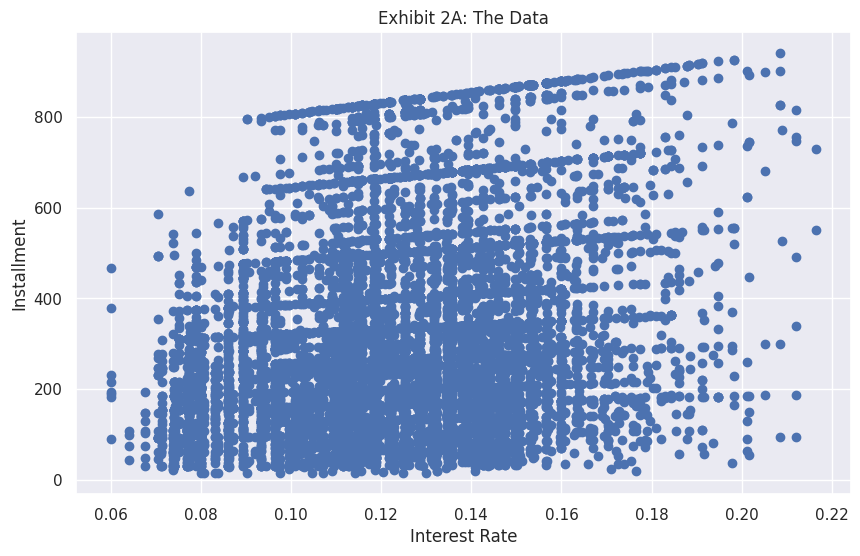

In [84]:
#plotting data
plt.figure(figsize = (10,6))
plt.scatter(df['int.rate'],df['installment'])
plt.title("Exhibit 2A: The Data")
plt.xlabel("Interest Rate")
plt.ylabel("Installment")

In [85]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment            int64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [86]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidian Distance')

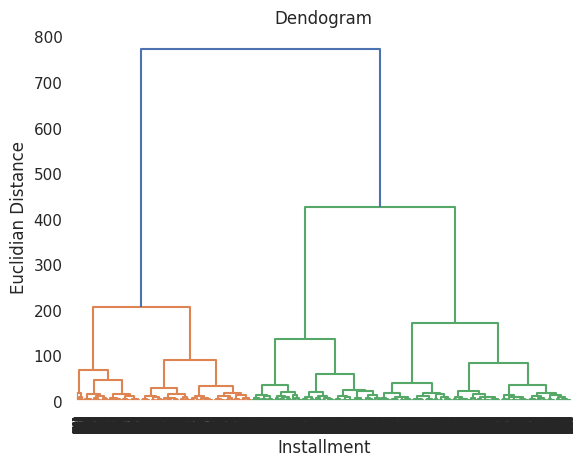

In [87]:
#Creating dendrogram
dendrogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title('Dendogram')
plt.xlabel("Installment")
plt.ylabel("Euclidian Distance")

In [88]:
X,clusters = make_blobs(n_samples = 2500, centers = 3,cluster_std = 0.50,random_state=0)

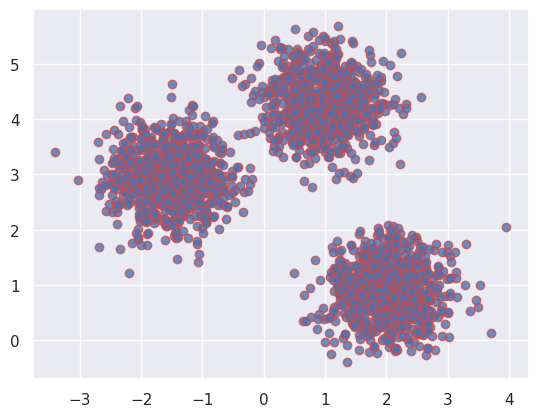

In [89]:
plt.scatter(X[:,0],X[:,1],alpha=0.8,edgecolors='r')

In [90]:
#initializing and training the model
brc = Birch(branching_factor = 50,n_clusters = 3,threshold = 1.5)
brc.fit(X)

Birch(threshold=1.5)

In [91]:
labels = brc.predict(X)
labels

array([2, 0, 2, ..., 2, 0, 2])

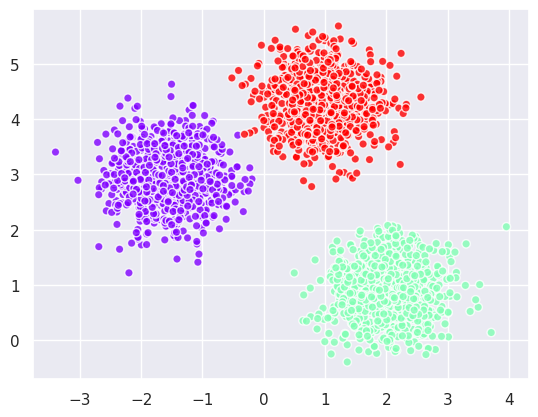

In [92]:
#plotting again but this time with a different color for each cluster
plt.scatter(X[:,0],X[:,1],c=labels,cmap='rainbow',alpha=0.8,edgecolors='w')